## Data cleaning

###### 1. email data processing 

In [1]:
import pandas as pd
from nltk import word_tokenize
import nltk
from nltk.corpus import stopwords
import re
import string
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud



# 1. Lire les données à partir du fichier Excel
nom_fichier = "C:\\Users\\MSI\\Documents\\reclamation1.xlsx"  

In [2]:
data_frame = pd.read_excel(nom_fichier)

In [3]:
data_frame.head(5)

,Type,Réclamation / requête,Catégorie
0,Réclamation,Je ne peux pas effectuer de retrait au distri...,monétique
1,Réclamation,J'ai retiré une somme d'argent de 500 dinars d...,monétique
2,requête,"Bonjour MR,Mdme\nJe suis à l’étranger et je vo...",fonctionnement de comptes
3,Réclamation,bonjour . \nveuillez vérifier le dernier retra...,monétique
4,Réclamation,Bonjour le 4/12/2023 Il y a eu un virement d'...,opérations bancaires internationales


In [16]:
data_frame = data_frame.dropna()

X = data_frame["Réclamation / requête"]
y = data_frame["Catégorie"]

# 2. Prétraitement des données
X.unique()

y = y.str.lower().str.strip()
y = y.replace({
    'fonctionnement de comptes': 'fonctionnement de comptes',
    ' crédit': 'Crédit',
    'opérations bancaires internationales': 'opérations bancaires internationales',
    'services bancaires à distance': 'Services bancaires à distance',
    'accueil et qualité de service': 'accueil et qualité de service'
})

# Expansion des contractions
contractions_francaises = {
    r"\b(l')([aeiouhAEIOUH])": r"le \2",
    r"\b(L')([aeiouhAEIOUH])": r"Le \2",
    r"\b(d')([aeiouhAEIOUH])": r"de \2",
    r"\b(D')([aeiouhAEIOUH])": r"De \2",
    r"\b(j')([aeiouhAEIOUH])": r"je \2",
    r"\b(J')([aeiouhAEIOUH])": r"Je \2",
    r"\b(m')([aeiouhAEIOUH])": r"me \2",
    r"\b(M')([aeiouhAEIOUH])": r"Me \2",
    r"\b(n')([aeiouhAEIOUH])": r"ne \2",
    r"\b(N')([aeiouhAEIOUH])": r"Ne \2",
    r"\b(s')([aeiouhAEIOUH])": r"se \2",
    r"\b(S')([aeiouhAEIOUH])": r"Se \2",
    r"\b(t')([aeiouhAEIOUH])": r"te \2",
    r"\b(T')([aeiouhAEIOUH])": r"Te \2",
    r"\b(c')([aeiouhAEIOUH])": r"ce \2",
    r"\b(C')([aeiouhAEIOUH])": r"Ce \2",
    r"\b(qu')([aeiouhAEIOUH])": r"que \2",
    r"\b(Qu')([aeiouhAEIOUH])": r"Que \2"
}


In [17]:
def expand_french_contractions(text):
    for pattern, replacement in contractions_francaises.items():
        text = re.sub(pattern, replacement, text)
    return text

def remove_digits(text):
    text_no_digits = re.sub(r'\d+', '', text)
    text_no_digits_words = re.sub(r'\b\w*\d\w*\b', '', text_no_digits)
    return text_no_digits_words

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    text_no_punctuation = text.translate(translator)
    return text_no_punctuation

nltk.download('stopwords')
stop_words = set(stopwords.words('french'))
stop_words.update(['un', 'une', 'stb', 'foulen', 'ben', 'bonjour', 'merci', '’', 'MR' , 'Mme'])

def remove_stopwords(text):
    words = word_tokenize(text)
    clean_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(clean_words)


def tokenize_text(text):
    return word_tokenize(text)

def merge_tokens(tokens):
    return ' '.join(tokens)

nlp = spacy.load('fr_core_news_sm')

def lemmatize_text(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
X = X.apply(expand_french_contractions)
X = X.str.lower()
X = X.apply(remove_digits)
X = X.apply(remove_punctuation)
X = X.apply(remove_stopwords)
nltk.download('punkt')
X = X.apply(tokenize_text)
X = X.apply(merge_tokens)
X = X.apply(lemmatize_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
X

0      [peux, effectuer, retraire, distributeur, auto...
1      [retirer, somme, argent, dinar, distributeur, ...
2      [mrmdme, étranger, vouloir, ferméclôture, comp...
3      [vouloir, vérifier, dernier, retrait, retraire...
4      [avoir, virement, banqu, américain, vers, comp...
                             ...                        
343    [souhaiter, obtenir, précision, processu, récl...
344    [long, file, attente, agencer, seulement, deux...
345    [site, web, accessible, depuis, plusieurs, heu...
346    [vouloir, savoir, comment, changer, adresse, p...
347    [personnel, avoir, informer, frais, supplément...
Name: Réclamation / requête, Length: 346, dtype: object

##### 2.Vectorisation text

In [20]:
# Fusionner les listes de tokens en une seule chaîne de caractères
X_merged = X.apply(lambda tokens: ' '.join(tokens))
# Vectorisation du texte
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(X_merged)


In [21]:
X_merged

0      peux effectuer retraire distributeur automatiq...
1      retirer somme argent dinar distributeur automa...
2      mrmdme étranger vouloir ferméclôture compte co...
3      vouloir vérifier dernier retrait retraire avoi...
4      avoir virement banqu américain vers compte tun...
                             ...                        
343    souhaiter obtenir précision processu réclamati...
344    long file attente agencer seulement deux guich...
345    site web accessible depuis plusieurs heure avo...
346    vouloir savoir comment changer adresse postal ...
347    personnel avoir informer frais supplémentaire ...
Name: Réclamation / requête, Length: 346, dtype: object

In [22]:
X_tfidf

<346x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 5777 stored elements in Compressed Sparse Row format>

In [23]:
###  data split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [24]:
categorie_counts = y.value_counts()

In [25]:
categorie_counts

Catégorie
accueil et qualité de service           75
crédit                                  57
monétique                               47
fonctionnement de comptes               44
opérations bancaires internationales    42
Services bancaires à distance           41
moyens de paiement hors monétique       40
Name: count, dtype: int64

In [26]:
y.unique()

array(['monétique', 'fonctionnement de comptes',
       'opérations bancaires internationales',
       'moyens de paiement hors monétique',
       'Services bancaires à distance', 'accueil et qualité de service',
       'crédit'], dtype=object)

In [27]:
reclamations_par_categorie = y.value_counts()

In [28]:
reclamations_par_categorie

Catégorie
accueil et qualité de service           75
crédit                                  57
monétique                               47
fonctionnement de comptes               44
opérations bancaires internationales    42
Services bancaires à distance           41
moyens de paiement hors monétique       40
Name: count, dtype: int64

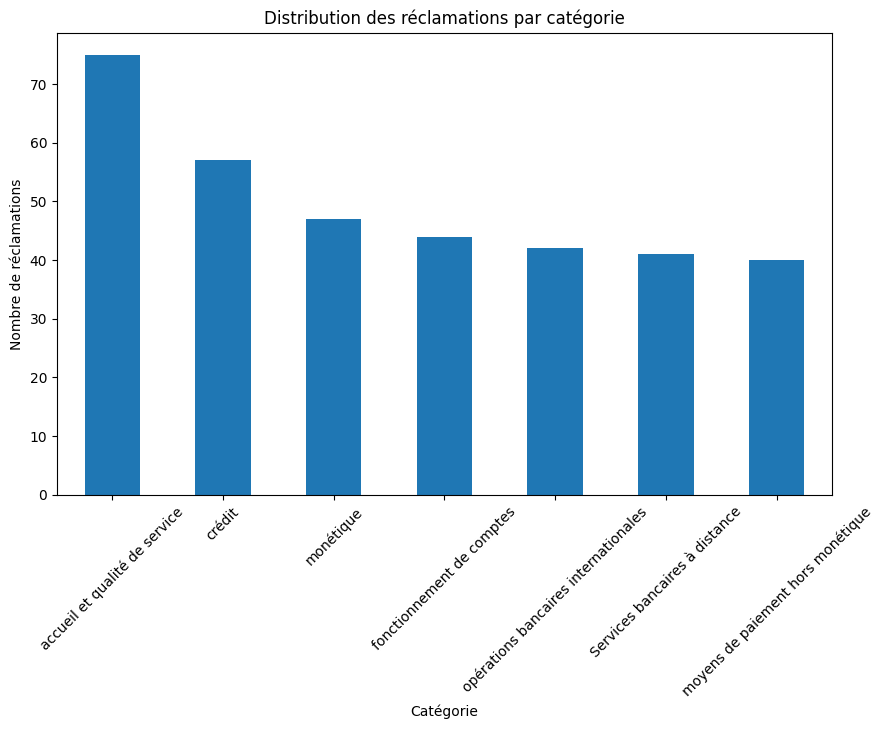

In [29]:

reclamations_par_categorie = y.value_counts()
plt.figure(figsize=(10, 6))
reclamations_par_categorie.plot(kind='bar')
plt.title('Distribution des réclamations par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de réclamations')
plt.xticks(rotation=45)
plt.show()

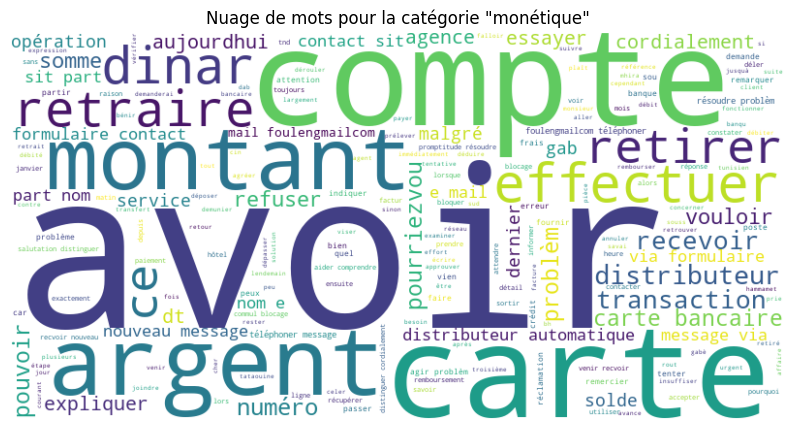

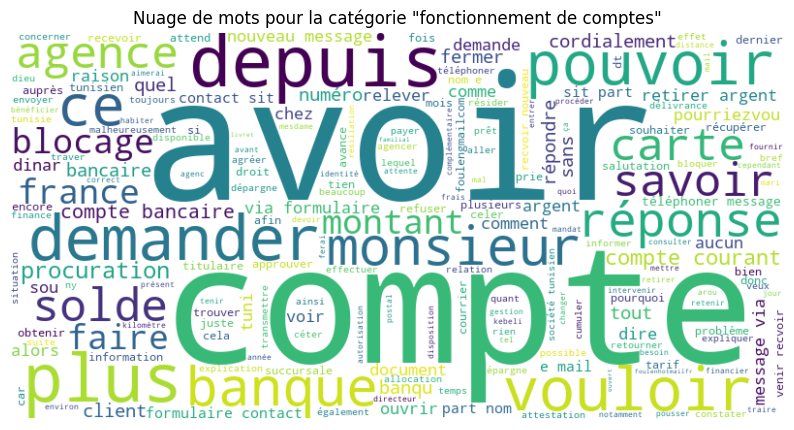

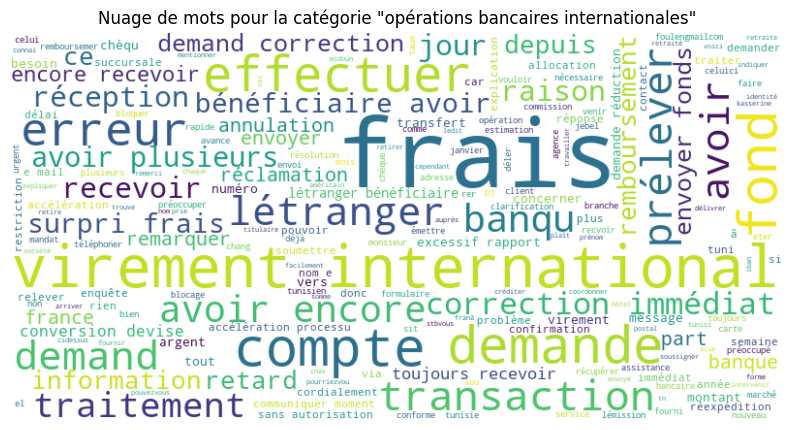

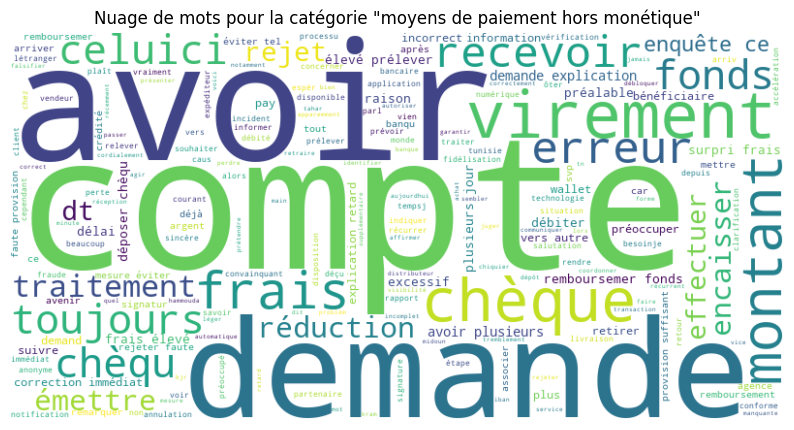

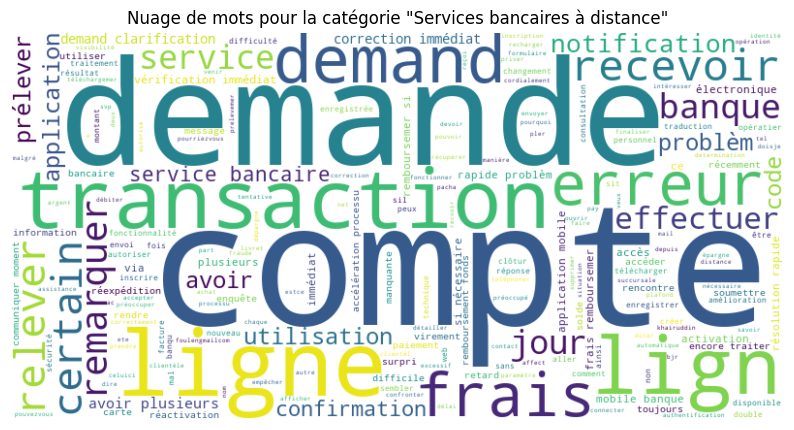

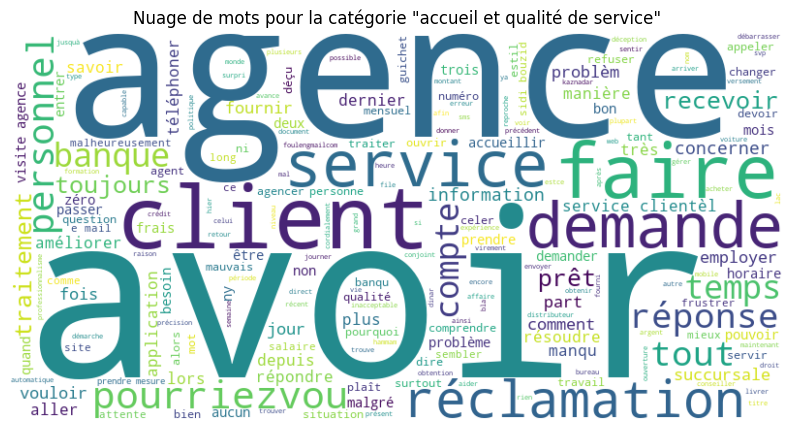

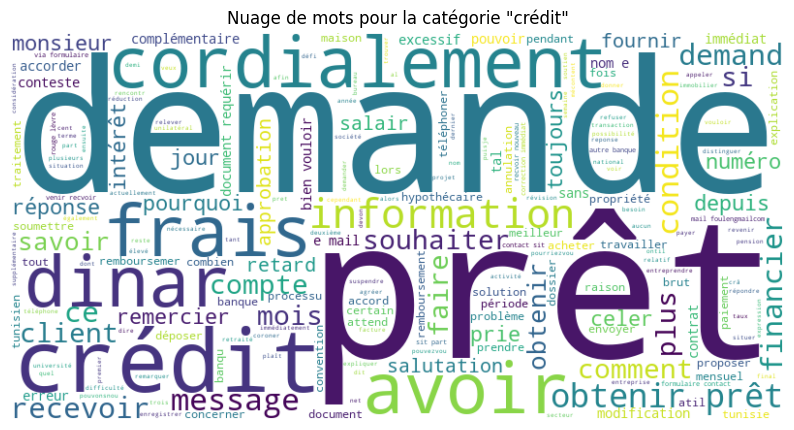

In [30]:
categories_uniques = y.unique()
for categorie in categories_uniques:
    reclamations_categorie = X[y == categorie]
    # Concaténer les listes de tokens en une seule chaîne de caractères
    reclamations_categorie_concatenated = [' '.join(tokens) for tokens in reclamations_categorie]
    corpus = ' '.join(reclamations_categorie_concatenated)
    # un nuage de mots
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(corpus)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Nuage de mots pour la catégorie "{categorie}"')
    plt.axis('off')
    plt.show()
